this notebook is meant to see if we are able to extract character roundness mappings from the dataset provided by Fort et al (2015)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'F:\OneDrive - Nanyang Technological University\FYP\Pseudoword-Generator\datasets\Fortetal2015_dataforOSF.csv')
data

,Study,Stimuli,ExperimentalRoundScore,ModelRoundScore
0,FortExp3,cel_bebi_1_ids.wav,33,5.8294
1,FortExp3,cel_bibe_2_ids.wav,42,12.2039
2,FortExp3,cel_bobou_1_ids.wav,33,25.6795
3,FortExp3,cel_boubo_1_ids.wav,50,29.2659
4,FortExp3,cel_chechi_3_ids.wav,-25,-10.6296
...,...,...,...,...
119,FortExp2,outou_2.wav,-10,-16.3581
120,FortExp2,uku_2.wav,-20,-14.6789
121,FortExp2,ulu_3.wav,42,32.9821
122,FortExp2,umu_3.wav,42,41.1944


drop unnecessary columns

In [3]:
data = data.drop(columns=['Study', 'ModelRoundScore'])
data

,Stimuli,ExperimentalRoundScore
0,cel_bebi_1_ids.wav,33
1,cel_bibe_2_ids.wav,42
2,cel_bobou_1_ids.wav,33
3,cel_boubo_1_ids.wav,50
4,cel_chechi_3_ids.wav,-25
...,...,...
119,outou_2.wav,-10
120,uku_2.wav,-20
121,ulu_3.wav,42
122,umu_3.wav,42


extracting the pseudowords from the filenames

In [4]:
def extract_pseudowords(filename):
    result = filename
    if result.startswith('cel_'):
        result = result[4:]
    result = result.split('_')[0]
    return result

In [5]:
data['Stimuli'] = data['Stimuli'].apply(extract_pseudowords)
data

,Stimuli,ExperimentalRoundScore
0,bebi,33
1,bibe,42
2,bobou,33
3,boubo,50
4,chechi,-25
...,...,...
119,outou,-10
120,uku,-20
121,ulu,42
122,umu,42


calculating the total score, then calculating the number of appearances of each character, then calculating the average roundness score of each character

In [6]:
words = data['Stimuli']
roundness_values = data['ExperimentalRoundScore']

# Create a list to hold tuples of (character, roundness_value)
characters_and_scores = []

for word, score in zip(words, roundness_values):
    # Split the word into characters
    chars = list(word.lower())  # Assuming case-insensitive
    for char, s in zip(chars, [score] * len(chars)):
        characters_and_scores.append((char, s))

# show the first word 'bebi' to make sure the processing is correct
characters_and_scores[:4]

[('b', 33), ('e', 33), ('b', 33), ('i', 33)]

In [7]:
total_score = {}
for char, score in characters_and_scores:
    if char in total_score:
        total_score[char] += score
    else:
        total_score[char] = score


# Count occurrences of each character
counts = {}
for char, _ in characters_and_scores:
    if char in counts:
        counts[char] += 1
    else:
        counts[char] = 1

# Calculate average per character
average_roundness = {char: round(
    total_score[char] / counts[char], 2) for char in total_score}

average_roundness

{'b': 39.5,
 'e': 0.07,
 'i': 0.14,
 'o': 21.86,
 'u': 16.16,
 'c': 16.75,
 'h': 16.75,
 'd': 14.5,
 'f': 4.25,
 'g': 18.75,
 'j': 12.5,
 'k': -18.79,
 'l': 39.77,
 'm': 39.17,
 'n': 15.0,
 'p': 8.67,
 's': 14.5,
 't': -17.85,
 'v': 3.0,
 'z': -31.5,
 'a': 10.6}

normalizing the character scores

In [8]:
max_value = max(average_roundness.values())
min_value = min(average_roundness.values())

print(f"Largest value: {max_value}")
print(f"Smallest value: {min_value}")

Largest value: 39.77
Smallest value: -31.5


In [9]:
normalized_scores = {}
for key, value in average_roundness.items():
    normalized_value = (value - min_value) / (max_value - min_value)
    normalized_scores[key] = normalized_value

normalized_scores

{'b': 0.9962115897291987,
 'e': 0.4429633787007155,
 'i': 0.44394555914129363,
 'o': 0.7487021187035217,
 'u': 0.6687245685421634,
 'c': 0.6770029465413216,
 'h': 0.6770029465413216,
 'd': 0.6454328609513118,
 'f': 0.5016135821523782,
 'g': 0.7050652448435526,
 'j': 0.6173705626490809,
 'k': 0.1783359057106777,
 'l': 1.0,
 'm': 0.9915813105093306,
 'n': 0.6524484355268696,
 'p': 0.5636312614003086,
 's': 0.6454328609513118,
 't': 0.19152518591272621,
 'v': 0.48407464571348385,
 'z': 0.0,
 'a': 0.5907113792619615}

EDA

In [10]:
import string

length = len(normalized_scores)
print(f"Length of the dictionary: {length}")

# Example code to find missing characters (assuming all possible letters are 'a' to 'z')
all_letters = set(string.ascii_lowercase)
missing = all_letters - normalized_scores.keys()
if not missing:
    print("All characters present in 'a' to 'z'.")
else:
    print(f"Missing characters: {missing}")
    
values = list(normalized_scores.values())
average = sum(values) / len(values)
print(f"Average roundness of all chars: {average}")

Length of the dictionary: 21
Missing characters: {'r', 'y', 'q', 'x', 'w'}
Average roundness of all chars: 0.5915131592134537


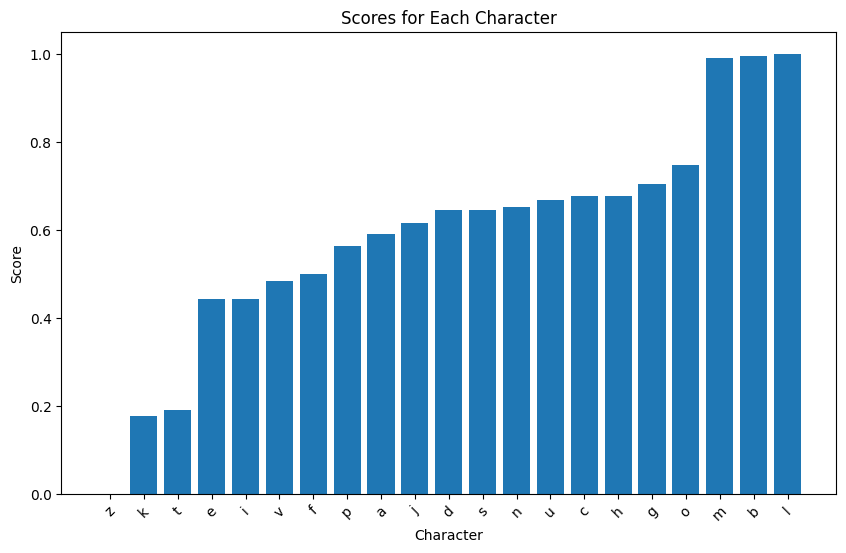

In [11]:
import matplotlib.pyplot as plt

# Sort the dictionary by value
sorted_normalized_scores = dict(sorted(normalized_scores.items(), key=lambda item: item[1]))

plt.figure(figsize=(10, 6))
plt.bar(sorted_normalized_scores.keys(), sorted_normalized_scores.values())
plt.xlabel('Character')
plt.ylabel('Score')
plt.title('Scores for Each Character')
plt.xticks(rotation=45)  # Rotate x-labels for clarity
plt.show()

In [12]:
import numpy as np
sorted_values = sorted(normalized_scores.values())
n = len(sorted_values)
if n % 2 == 1:
    median = sorted_values[n // 2]
else:
    median = (sorted_values[n // 2 - 1] + sorted_values[n // 2]) / 2
print(f"Median score: {median}")

scores_array = list(normalized_scores.values())
mean = np.mean(scores_array)
variance = np.var(scores_array)
std_dev = np.std(scores_array)

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")

Median score: 0.6454328609513118
Mean: 0.5915131592134537
Variance: 0.06209115069907679
Standard Deviation: 0.24918095974427257


splitting into vowels and consonants

In [13]:
consonants = {key: value for key, value in normalized_scores.items() if key not in 'aeiou'}
vowels = {key: value for key, value in normalized_scores.items() if key in 'aeiou'}

saving into json

In [14]:
sound_mapping = {"consonants": consonants, "vowels": vowels}
sound_mapping

{'consonants': {'b': 0.9962115897291987,
  'c': 0.6770029465413216,
  'h': 0.6770029465413216,
  'd': 0.6454328609513118,
  'f': 0.5016135821523782,
  'g': 0.7050652448435526,
  'j': 0.6173705626490809,
  'k': 0.1783359057106777,
  'l': 1.0,
  'm': 0.9915813105093306,
  'n': 0.6524484355268696,
  'p': 0.5636312614003086,
  's': 0.6454328609513118,
  't': 0.19152518591272621,
  'v': 0.48407464571348385,
  'z': 0.0},
 'vowels': {'e': 0.4429633787007155,
  'i': 0.44394555914129363,
  'o': 0.7487021187035217,
  'u': 0.6687245685421634,
  'a': 0.5907113792619615}}

In [15]:
import json

json.dump(
    sound_mapping,
    open(r'F:\OneDrive - Nanyang Technological University\FYP\Pseudoword-Generator\datasets\sound_mappings.json', 'w'),
    indent=4,
    sort_keys=True,
    ensure_ascii=True
)